In [74]:
import pandas as pd
import matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/ivanbersenev/Documents/code/python/VKDATAML/ikit.csv")

In [12]:
# Данные
# name - имя подписчика группы вконтакте Икит
# bdata - дата рождения
# city - город
# home_town - родной город
# sex - пол (0 - не указан, 1 - ж, 2 - м)
# community - группа пользователя, посчитанная по алгоритму лувена на основе близости к другим точкам
# degree - количество друзей пользователя, которые тоже подписаны на группу икита
# centrality - центральность ноды, рассчитанная как degree деленое на максимальное degree
# betweenness_centrality - коэффициент важности узла. Увеличивается пропорционально тому, сколько сообществ соединяет нода
# closeness_centrality - показывает, насколько близко узел расположен к остальным узлам сети
# eigenvector_centrality - важность узла на основе важности его соседей
# pagerank - важность узла, рассчитанная анологично тому, как рассчитывается важность страниц в google

df

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
0,0,Alexandra Matuzko,NaN,Krasnoyarsk,NaN,1,2,14,0.002801,0.000302,0.248135,8.878481e-03,0.000208,196398
1,1,Anna Gosteva,13.10,Krasnoyarsk,NaN,1,2,28,0.005601,0.000388,0.282400,2.776468e-02,0.000357,761344
2,2,Alexandra Dvorinovich,28.1,Krasnoyarsk,NaN,1,2,53,0.010602,0.002881,0.293149,3.502240e-02,0.000689,1319095
3,3,Ksenia Shatrova,6.1,Krasnoyarsk,NaN,1,2,61,0.012202,0.002191,0.284383,2.733603e-02,0.000879,2579587
4,4,Denis Kustov,NaN,Krasnoyarsk,NaN,2,2,73,0.014603,0.002155,0.300108,5.617826e-02,0.000883,4829157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Valery Vorovenko,1.4.1979,Krasnoyarsk,NaN,2,2,1,0.000200,0.000000,0.199639,2.782068e-04,0.000052,740973496
4996,4996,Sergey Vestfal,NaN,NaN,NaN,2,1112,0,0.000000,0.000000,0.000000,4.942268e-27,0.000037,741504346
4997,4997,Nurtilek Toktosunov,23.11.2005,NaN,NaN,2,1113,0,0.000000,0.000000,0.000000,4.942268e-27,0.000037,742330115
4998,4998,Alexander Bazhenov,27.5.1952,NaN,NaN,2,1114,0,0.000000,0.000000,0.000000,4.942268e-27,0.000037,743696229


In [10]:
# сортировка по degree
df.sort_values(by = "degree", ascending=False).head(5)

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
230,230,Lyubov Makukha,10.3.1979,NaN,NaN,1,333,523,0.104621,0.074618,0.353925,0.192690,0.006573,392573443
192,192,Alexey Gubanov,17.10.2002,Zheleznogorsk,NaN,2,333,381,0.076215,0.036124,0.346757,0.207320,0.004275,166813245
225,225,Vitaly Vaynshteyn,26.7,Krasnoyarsk,NaN,2,333,350,0.070014,0.040245,0.340259,0.144367,0.004393,273684138
5,5,Ruslan Brezhnev,NaN,Krasnoyarsk,NaN,2,2,231,0.046209,0.017530,0.315366,0.080767,0.002888,7382377
244,244,Tilekbek Tashbaev,26.12,NaN,NaN,2,139,224,0.044809,0.011519,0.323995,0.146887,0.002323,224381850


In [15]:
# сортирвка по betweenness_centrality. Вывожу первые пять значений чтобы не занимать много места
df.sort_values(by = "betweenness_centrality", ascending=False).head(5)

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
230,230,Lyubov Makukha,10.3.1979,NaN,NaN,1,333,523,0.104621,0.074618,0.353925,0.192690,0.006573,392573443
225,225,Vitaly Vaynshteyn,26.7,Krasnoyarsk,NaN,2,333,350,0.070014,0.040245,0.340259,0.144367,0.004393,273684138
192,192,Alexey Gubanov,17.10.2002,Zheleznogorsk,NaN,2,333,381,0.076215,0.036124,0.346757,0.207320,0.004275,166813245
581,581,Anastasia Stalmak,NaN,Krasnoyarsk,NaN,1,465,219,0.043809,0.020036,0.320117,0.079115,0.002621,435407698
198,198,Pavel Peresunko,22.1,Krasnoyarsk,NaN,2,2,178,0.035607,0.018972,0.305868,0.042392,0.002396,176592697


In [17]:
#Фильтрация по полу. Только мужчины
df[df.sex == 2].head(5)

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
4,4,Denis Kustov,NaN,Krasnoyarsk,NaN,2,2,73,0.014603,0.002155,0.300108,0.056178,0.000883,4829157
5,5,Ruslan Brezhnev,NaN,Krasnoyarsk,NaN,2,2,231,0.046209,0.017530,0.315366,0.080767,0.002888,7382377
9,9,Andrey Kushnarenko,28.7.1978,Krasnoyarsk,NaN,2,2,170,0.034007,0.011585,0.311012,0.079085,0.001970,90694585
13,13,Petr Dyachuk,29.3,Krasnoyarsk,NaN,2,2,49,0.009802,0.001340,0.293091,0.036883,0.000600,324960170
14,14,Kubanychbek Kamchybekov,5.6.2003,Krasnoyarsk,NaN,2,139,87,0.017403,0.001189,0.282720,0.047198,0.000913,674207746


In [22]:
# Условное форматирование по значению. Если degree < 100 - выделяем красным
def formatting(val):
    color = 'red' if val < 100 else 'black'
    return f'color: {color}'

df.head(10).style.map(formatting, subset = ["degree"])

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
0,0,Alexandra Matuzko,nan,Krasnoyarsk,nan,1,2,14,0.002801,0.000302,0.248135,0.008878,0.000208,196398
1,1,Anna Gosteva,13.10,Krasnoyarsk,nan,1,2,28,0.005601,0.000388,0.282400,0.027765,0.000357,761344
2,2,Alexandra Dvorinovich,28.1,Krasnoyarsk,nan,1,2,53,0.010602,0.002881,0.293149,0.035022,0.000689,1319095
3,3,Ksenia Shatrova,6.1,Krasnoyarsk,nan,1,2,61,0.012202,0.002191,0.284383,0.027336,0.000879,2579587
4,4,Denis Kustov,nan,Krasnoyarsk,nan,2,2,73,0.014603,0.002155,0.300108,0.056178,0.000883,4829157
5,5,Ruslan Brezhnev,nan,Krasnoyarsk,nan,2,2,231,0.046209,0.017530,0.315366,0.080767,0.002888,7382377
6,6,Anastasia Tamarovskaya,nan,Krasnoyarsk,nan,1,2,45,0.009002,0.001223,0.277920,0.026180,0.000572,12978275
7,7,Sofya Ilina,nan,nan,nan,1,2,2,0.000400,0.000000,0.188747,0.000164,0.000072,29836588
8,8,Anna Pyataeva,19.11.1979,Krasnoyarsk,nan,1,2,101,0.020204,0.005803,0.307690,0.062167,0.001235,64813933
9,9,Andrey Kushnarenko,28.7.1978,Krasnoyarsk,nan,2,2,170,0.034007,0.011585,0.311012,0.079085,0.001970,90694585


In [33]:
# Условное форматирование. Выводим первые 10 самых больших значений по centrality
df.sort_values(by="centrality", ascending=False).head(10)

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
230,230,Lyubov Makukha,10.3.1979,NaN,NaN,1,333,523,0.104621,0.074618,0.353925,0.192690,0.006573,392573443
192,192,Alexey Gubanov,17.10.2002,Zheleznogorsk,NaN,2,333,381,0.076215,0.036124,0.346757,0.207320,0.004275,166813245
225,225,Vitaly Vaynshteyn,26.7,Krasnoyarsk,NaN,2,333,350,0.070014,0.040245,0.340259,0.144367,0.004393,273684138
5,5,Ruslan Brezhnev,NaN,Krasnoyarsk,NaN,2,2,231,0.046209,0.017530,0.315366,0.080767,0.002888,7382377
244,244,Tilekbek Tashbaev,26.12,NaN,NaN,2,139,224,0.044809,0.011519,0.323995,0.146887,0.002323,224381850
403,403,Vasily Nikonov,NaN,Sayanogorsk,NaN,2,9,222,0.044409,0.014702,0.331230,0.147469,0.002477,277634207
581,581,Anastasia Stalmak,NaN,Krasnoyarsk,NaN,1,465,219,0.043809,0.020036,0.320117,0.079115,0.002621,435407698
1068,1068,Alexander Presnov,20.8,NaN,NaN,2,139,195,0.039008,0.010636,0.316165,0.125272,0.002096,267415361
37,37,Ekaterina Chzhan,4.5,Krasnoyarsk,NaN,1,2,188,0.037608,0.016102,0.330354,0.110061,0.002262,1661551
198,198,Pavel Peresunko,22.1,Krasnoyarsk,NaN,2,2,178,0.035607,0.018972,0.305868,0.042392,0.002396,176592697


array([[<Axes: title={'center': 'community'}>]], dtype=object)

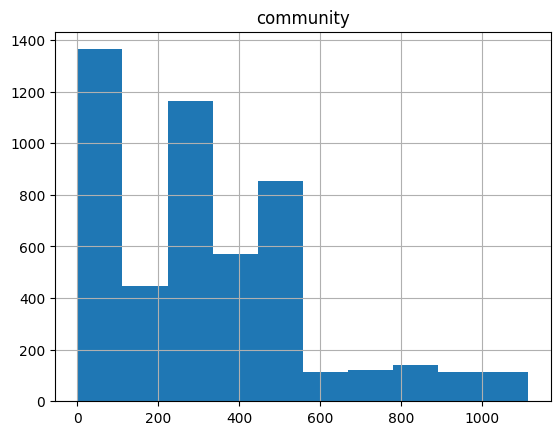

In [82]:
# гистограмма по community
df.hist("community")

In [71]:
# Форматирование цвета ячеек по их величине
max_val = df.degree.max()
def formatting(val):
    ratio = val / max_value
    r = int( max(0, min(255, 255 * (1 - ratio))))
    g = int(max(0, min(255, 255 * ratio)))
    color = f'rgba({r},{g},0,1)'
    return f'color: {color}'

df.sort_values(by="degree", ascending = False).head(10).style.map(formatting, subset = ["degree"])

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
230,230,Lyubov Makukha,10.3.1979,nan,nan,1,333,523,0.104621,0.074618,0.353925,0.192690,0.006573,392573443
192,192,Alexey Gubanov,17.10.2002,Zheleznogorsk,nan,2,333,381,0.076215,0.036124,0.346757,0.207320,0.004275,166813245
225,225,Vitaly Vaynshteyn,26.7,Krasnoyarsk,nan,2,333,350,0.070014,0.040245,0.340259,0.144367,0.004393,273684138
5,5,Ruslan Brezhnev,nan,Krasnoyarsk,nan,2,2,231,0.046209,0.017530,0.315366,0.080767,0.002888,7382377
244,244,Tilekbek Tashbaev,26.12,nan,nan,2,139,224,0.044809,0.011519,0.323995,0.146887,0.002323,224381850
403,403,Vasily Nikonov,nan,Sayanogorsk,nan,2,9,222,0.044409,0.014702,0.331230,0.147469,0.002477,277634207
581,581,Anastasia Stalmak,nan,Krasnoyarsk,nan,1,465,219,0.043809,0.020036,0.320117,0.079115,0.002621,435407698
1068,1068,Alexander Presnov,20.8,nan,nan,2,139,195,0.039008,0.010636,0.316165,0.125272,0.002096,267415361
37,37,Ekaterina Chzhan,4.5,Krasnoyarsk,nan,1,2,188,0.037608,0.016102,0.330354,0.110061,0.002262,1661551
198,198,Pavel Peresunko,22.1,Krasnoyarsk,nan,2,2,178,0.035607,0.018972,0.305868,0.042392,0.002396,176592697


In [84]:
# сводная таблица по основным числовым метрикам
df.describe()

,Unnamed: 0,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
count,5000.000000,0.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5.000000e+03
mean,2499.500000,NaN,1.599000,311.638400,13.108000,0.002622,0.000291,0.178465,5.964813e-03,0.000200,2.979998e+08
std,1443.520003,NaN,0.490558,261.788594,22.672325,0.004535,0.001614,0.100207,1.282396e-02,0.000262,1.792090e+08
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.942268e-27,0.000037,1.963980e+05
25%,1249.750000,NaN,1.000000,10.000000,1.000000,0.000200,0.000000,0.169602,1.730926e-05,0.000051,1.590053e+08
50%,2499.500000,NaN,2.000000,317.000000,6.000000,0.001200,0.000015,0.221506,1.593935e-03,0.000130,2.771760e+08
75%,3749.250000,NaN,2.000000,465.000000,17.000000,0.003401,0.000185,0.245507,6.303417e-03,0.000247,4.268579e+08
max,4999.000000,NaN,2.000000,1115.000000,523.000000,0.104621,0.074618,0.353925,2.073197e-01,0.006573,7.437004e+08


In [121]:
# сводная таблица по количеству упоминаний городов
df.groupby(['city']).aggregate({"city":"count"})

,city
city,
Abakan,44
Abalak,1
Aban,2
Abaza,1
Achinsk,28
...,...
Zheleznogorsk-Ilimsky,2
Zhitomir,1
Zhovkva,1


In [142]:
# сводная таблица по количеству людей разных полов из разных городов
df.groupby(['city','sex']).agg(['count']).id

count
city                  sex       
Abakan                1       24
                      2       20
Abalak                2        1
Aban                  1        1
                      2        1
...                          ...
Zheleznogorsk-Ilimsky 2        1
Zhitomir              1        1
Zhovkva               2        1
İstanbul              2        1
Ōsaka                 2        1

[406 rows x 1 columns]

In [144]:
# Сводная таблица по количеству студентов разных полов
df.groupby(["sex"]).agg(['count']).id

,count
sex,
0,1
1,2003
2,2996


In [152]:
# Сводная таблица по группам, выявленным по графовой близости
df.groupby(["community", "name"]).agg(['count']).id

count
community name                        
0         Olga Berestyuk             1
1         Stanislav Alyokminsky      1
2         Abdulmalik Akhmedov        1
          Agnessa Pogosyan           1
          Akmal Jumaev               1
...                                ...
1111      Lao Kay                    1
1112      Sergey Vestfal             1
1113      Nurtilek Toktosunov        1
1114      Alexander Bazhenov         1
1115      Evgenia Abramova           1

[4990 rows x 1 columns]

In [ ]:
# Цель: Исследовать данные о подписчиках сообщества Икита во вконтакте и узнать:
# 1)Кто является самым "дружелюбным" подписчиком?
# 2)Какое соотношение полов среди подписчиков?
# 3)Люди из скольких городов подписаны на группу икита?
# 4)На сколько разных групп можно разделить всех подписчиков икита, учитывая их графовую близость друг к другу?

# Среди подписчиков группы икита в социальной сети Вконтакте с большим отрывом самым дружелюбным подписчиком оказалась Любовь Макуха. 
# Среди ее друзей 523 человека подписаны на группу икита в соцсети Вконтакте. 
# Также было установлено количество подписчиков разных полов: 2996 подписчиков мужского пола и 2003 подписчиков женского пола.
# Помимо этого в ходе исследования было установлено, что подписчиками икита являются люди из 406 городов мира.
# Также выяснено, что студентов можно разбить на 1115 отдельных групп по их графовой близости
